# Linear least square fitting

In the lectures we looked at linear least square approximat to a linear fit. In this notebook we extend that general polynomial fits and then to general linear fits. This will involve simultaneous linear equations which we solve via matrix methods.

A model a linear if the parameters are independent of each other, i.e., 

$$f(x, \vec{\beta}) = \beta_0 x + \beta_1 \sin(x) $$

is a linear model whereas

$$f(x, \vec{\beta}) = \beta_0[x + \beta_1\sin(x)] $$

is a non-linear model due to the product $\beta_0 \beta_1$. In this notebook we will only look at fitting data linear with models.

## Setup and overview

For all the following algorithms let $(x_i,y_i)$ with $i=1\dots n$ be the data we want to fit to. Let the *residual* at each data point be given by 

$$ r_i = f(x_i,\vec{\beta}) - y_i $$


The goal is to vary $\vec{\beta}$ in order to minimize the sum of the squares of the residuals, i.e., we want to minimize, $S$, where

$$ S(\vec{\beta}) = \sum_{i=1}^n r_i^2 $$

As usual to find the minimize a function we find where the tangent(s) of the function are equal to zero.

## A quadratic example

Let's extend the linear model given in the notes to a quadratic model. Let our model be given by

$$ f(x, \vec{\beta}) = \beta_1 x + \beta_2 x^2$$

In this case

$$
\begin{align}
\frac{\partial S}{\partial \beta_1} &= \sum_{i=1}^n 2(\beta_1 x_i +\beta_2 x_i^2 - y_i) x_i = 0 \\
\frac{\partial S}{\partial \beta_2} &= \sum_{i=1}^n 2(\beta_1 x_i +\beta_2 x_i^2 - y_i) x_i^2 =0
\end{align}
$$

We can re-write this as matrix equation:

$$
\begin{bmatrix}\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i^3 \\ \sum_{i=1}^n x_i^3 & \sum_{i=1}^n x_i^4\end{bmatrix}\begin{bmatrix}\beta_1 \\ \beta_2 \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^n y_i x_i \\ \sum_{i=1}^n y_i x_i^2 \end{bmatrix}
$$

Writing this as a matrix equation in the form $X \vec{\beta} = \vec{\alpha}$ we can find the best fit parameters via $\vec{\beta} = X^{-1}\vec{\alpha}$.

Let's see this in action in the code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [4]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

First let's prepare some data to test the algorithm on

In [7]:
x = np.linspace(-4,4,100)

a = 3;
b = -2

y = a*x**2 + b*x

Next prepare the matrix $X$ and vector, $\vec{\alpha}$

In [8]:
X = np.sum(np.array([[x**4, x**3],[x**3, x**2]]),2)
alpha = np.sum(np.array([y*x**2, y*x]),1)

Now solve for $\vec{\beta}$

In [9]:
la.inv(X)@alpha

array([ 3., -2.])

The algorithm worked! We recoved the coefficients $a$ and $b$.

## Fitting to a polynomial

Now let's generalize to fitting data using an $n^{th}$-order polynomial. By making the natural extension of above we have

$$ f(x,\vec{\beta}) = \beta_0 + \beta_1 x + \beta_2 x^2 +\dots + \beta_n x^n$$

The  $(n+1)\times(n+1)$ system ofequations we have to solve is now given by

$$\begin{bmatrix}
X_0 & X_1 & \cdots & X_n \\
X_1 & X_2 & \cdots & X_{n+1} \\
\vdots & & & \vdots \\
X_n & X_{n+1} & \cdots & X_{2n}
\end{bmatrix}
\begin{bmatrix} \beta_0 \\ \beta_1 \\ \cdots \\ \beta_n \end{bmatrix} = 
\begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \cdots \\ \alpha_n \end{bmatrix}
$$

where $$
\begin{align}
X_n &= \sum_{i=1}^n x_i^n \\
\alpha_n &= \sum_{i=1}^n y_i x_i^n
\end{align}
$$

Let's now write a function that implements this algorithm

In [5]:
def PolynomialFit(xi, yi, n):
    X = np.zeros((n+1, n+1))
    alpha = np.zeros(n+1)

    for i in range(0,n+1):
        alpha[i] = np.sum(yi*xi**i)
        for j in range(0,n+1):
            X[i,j] = np.sum(xi**(i+j))

    return la.inv(X)@alpha

Let's make some data to test the function on

In [14]:
xi = np.linspace(-4,4,100)
yi = 9 - 9*xi -xi**2 + x**3

In [15]:
PolynomialFit(xi,yi, 3)

array([ 9., -9., -1.,  1.])

For this smooth data we recover precisely the coefficients of the cubic. Let's look at fitting some noisy data and plotting the result. First let's generate some noisy data and the fit to it.

In [16]:
yiNoisy = yi + 10*np.random.random(xi.size)

cubicFitCoeffs = PolynomialFit(xi, yiNoisy, 3)

cubicFit = cubicFitCoeffs[0] + cubicFitCoeffs[1]*xi + cubicFitCoeffs[2]*xi**2 + cubicFitCoeffs[3]*xi**3

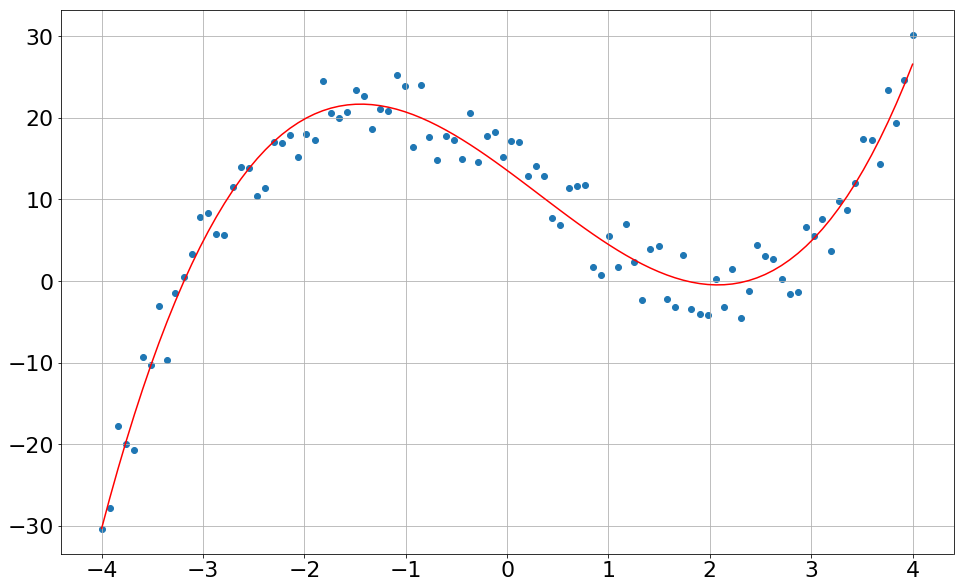

In [17]:
plt.grid(True)
plt.scatter(xi,yiNoisy);
plt.plot(xi, cubicFit, 'r');

## Fitting to a general linear model

If we have a general linear model we can still perform fits. We wont derive the algorithm below but it is a generalization of the above methods. Instead we will just state it and show it in action.

$$ f(x, \vec{\beta}) = \beta_0 \phi_0(x) + \beta_1 \phi_1(x) + \dots + \beta_n \phi_n(x) $$

Then we can define the elements of a matrix $X$ via

$$ X_{ij} = \phi_j(x_i) $$

Then the coefficients in the fit can be calculated via

$$ \vec{\beta} = (X^T X)^{-1} X^T \vec{y} $$

where $\vec{y}$ is the $y$-values of the data.

### Example

Let's look at the example where the data is given by

$$ y_i = 5\sin(x_i) - x + 4$$

In this case $\phi_0 = \sin(x)$, $\phi_1 = x$ and $\phi_2 = 4$. Let's now define the matrix $X$ and the vector $\vec{y}$.

In [44]:
xi = np.linspace(-4,4,100)
yi = 5*np.sin(xi) - xi + 4

X = np.array([np.sin(xi), xi, 4*np.ones(xi.size)]).T


Applying the formula abovr we recover the coefficients:

In [45]:
la.inv(X.T@X)@X.T@yi

array([ 5., -1.,  1.])

Let's look at a noise data version

In [48]:
yiNoisy = 5*np.sin(xi) - xi + 5*np.random.rand(xi.size)

fitCoeffs = la.inv(X.T@X)@X.T@yiNoisy

fit = fitCoeffs[0]*np.sin(xi) + fitCoeffs[1]*xi + fitCoeffs[2]*4

print(fitCoeffs)

[ 5.1905638  -0.950227    0.64035906]


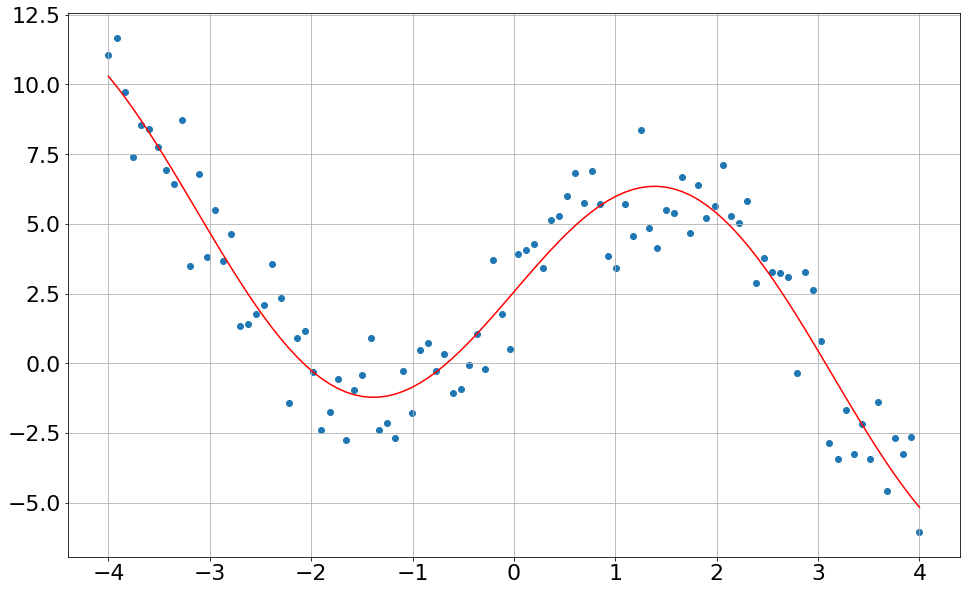

In [51]:
plt.scatter(xi, yiNoisy)
plt.grid(True)
plt.plot(xi, fit, 'r');